In [ ]:
# Member 1 - Farida Hegazy
# 1. Dataset Loading & Library Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)
sns.set(style="whitegrid", context="notebook")

crashes_url = "https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=download"
persons_url = "https://data.cityofnewyork.us/api/views/f55k-p6yu/rows.csv?accessType=download"

df_crashes = pd.read_csv(crashes_url, low_memory=False)
df_persons = pd.read_csv(persons_url, low_memory=False)

df_crashes.head()
df_persons.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,Does Not Apply,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,Does Not Apply,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F


In [ ]:
# 2. Basic Dataset Structure & Dimensions
print("Crashes shape:", df_crashes.shape)
print("Persons shape:", df_persons.shape)

df_crashes.columns
df_persons.columns

df_crashes.dtypes
df_persons.dtypes

Crashes shape: (2221796, 29)
Persons shape: (5824319, 21)


,0
UNIQUE_ID,int64
COLLISION_ID,int64
CRASH_DATE,object
CRASH_TIME,object
PERSON_ID,object
PERSON_TYPE,object
PERSON_INJURY,object
VEHICLE_ID,float64
PERSON_AGE,float64
EJECTION,object


In [ ]:
# 3. Missing Data Profiling
def missing_percent(df):
    return (df.isna().mean() * 100).sort_values(ascending=False)

missing_crashes = missing_percent(df_crashes)
missing_persons = missing_percent(df_persons)

missing_crashes.head(20)
missing_persons.head(20)

,0
CONTRIBUTING_FACTOR_2,98.265909
CONTRIBUTING_FACTOR_1,98.263625
PED_ACTION,98.241666
PED_LOCATION,98.239932
SAFETY_EQUIPMENT,52.071787
EJECTION,48.584890
POSITION_IN_VEHICLE,48.577044
EMOTIONAL_STATUS,46.916747
BODILY_INJURY,46.916009
COMPLAINT,46.915888


In [ ]:
# 4. Key Variable Exploration (Raw Frequency Checks)
# Persons dataset checks
cols_person_key = ["PERSON_TYPE", "PERSON_SEX", "PERSON_AGE", "PERSON_INJURY"]

for col in cols_person_key:
    print(f"\n{col} — unique values:", df_persons[col].nunique())
    print(df_persons[col].value_counts(dropna=False).head(10))


PERSON_TYPE — unique values: 4
PERSON_TYPE
Occupant           5591468
Pedestrian          142333
Bicyclist            78285
Other Motorized      12233
Name: count, dtype: int64

PERSON_SEX — unique values: 3
PERSON_SEX
M      3158077
F      1578094
NaN     643917
U       444231
Name: count, dtype: int64

PERSON_AGE — unique values: 907
PERSON_AGE
NaN     650712
0.0     548050
30.0    119177
29.0    118200
28.0    117609
27.0    116820
31.0    114790
26.0    113308
32.0    113305
33.0    110562
Name: count, dtype: int64

PERSON_INJURY — unique values: 3
PERSON_INJURY
Unspecified    5091451
Injured         729350
Killed            3518
Name: count, dtype: int64


In [ ]:
# 4. Key Variable Exploration (Raw Frequency Checks)
# Crashes dataset checks
cols_crash_key = [
    "BOROUGH",
    "CRASH DATE",
    "CRASH TIME",
    "ON STREET NAME",
    "COLLISION_ID",
    "VEHICLE TYPE CODE 1",
    "CONTRIBUTING FACTOR VEHICLE 1",
    "NUMBER OF PERSONS INJURED",
    "NUMBER OF PERSONS KILLED",
]

for col in cols_crash_key:
    if col in df_crashes.columns:
        print(f"\n{col} — unique values:", df_crashes[col].nunique())
        print(df_crashes[col].value_counts(dropna=False).head(10))
    else:
        print(f"\n⚠️ Missing column: {col}")


BOROUGH — unique values: 5
BOROUGH
NaN              680536
BROOKLYN         493980
QUEENS           412994
MANHATTAN        341549
BRONX            228206
STATEN ISLAND     64531
Name: count, dtype: int64

CRASH DATE — unique values: 4888
CRASH DATE
01/21/2014    1161
11/15/2018    1065
12/15/2017     999
05/19/2017     974
01/18/2015     961
02/03/2014     960
03/06/2015     939
05/18/2017     911
01/07/2017     896
03/02/2018     884
Name: count, dtype: int64

CRASH TIME — unique values: 1440
CRASH TIME
16:00    29709
15:00    29195
17:00    29185
18:00    26951
14:00    26748
13:00    24895
0:00     23560
9:00     22675
12:00    22622
19:00    22566
Name: count, dtype: int64

ON STREET NAME — unique values: 22731
ON STREET NAME
NaN                                 484095
BROADWAY                             17277
ATLANTIC AVENUE                      15322
BELT PARKWAY                         13543
3 AVENUE                             12476
NORTHERN BOULEVARD                   11965


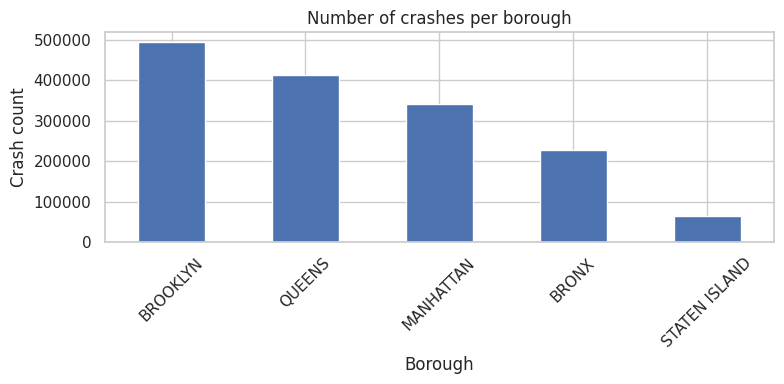

In [ ]:
# 5. Raw Exploratory Visualizations (Before Any Cleaning)
# Crash Counts by Borough
borough_counts = df_crashes["BOROUGH"].value_counts()

plt.figure(figsize=(8,4))
borough_counts.plot(kind="bar")
plt.title("Number of crashes per borough")
plt.xlabel("Borough")
plt.ylabel("Crash count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

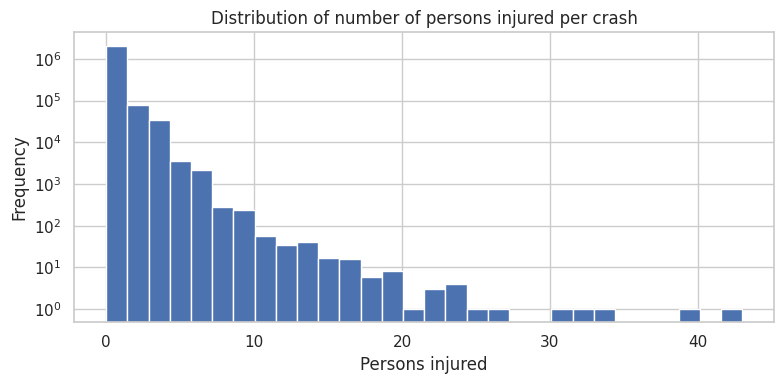

In [ ]:
# 5. Raw Exploratory Visualizations (Before Any Cleaning)
# Injury Distribution
plt.figure(figsize=(8,4))
df_crashes["NUMBER OF PERSONS INJURED"].hist(bins=30)
plt.title("Distribution of number of persons injured per crash")
plt.xlabel("Persons injured")
plt.ylabel("Frequency")
plt.yscale("log")
plt.tight_layout()
plt.show()

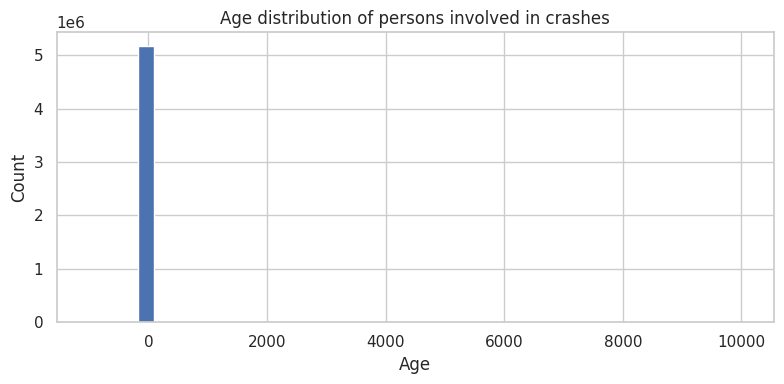

In [ ]:
# 5. Raw Exploratory Visualizations (Before Any Cleaning)
# Age Distribution
plt.figure(figsize=(8,4))
df_persons["PERSON_AGE"].dropna().hist(bins=40)
plt.title("Age distribution of persons involved in crashes")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

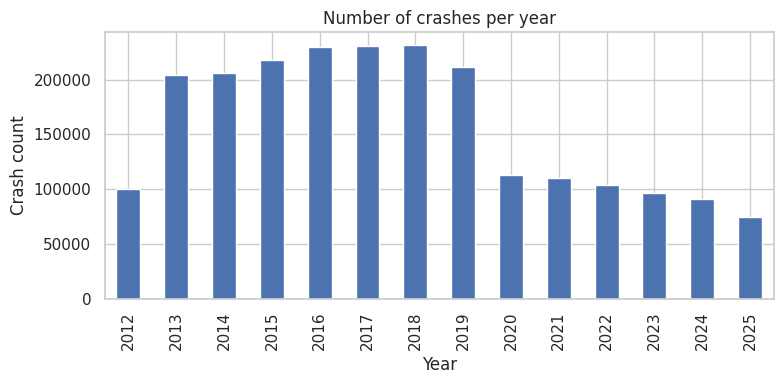

In [ ]:
# 5. Raw Exploratory Visualizations (Before Any Cleaning)
# Crashes per Year
df_crashes["CRASH DATE"] = pd.to_datetime(df_crashes["CRASH DATE"], errors="coerce")

df_crashes["CRASH_YEAR"] = df_crashes["CRASH DATE"].dt.year
year_counts = df_crashes["CRASH_YEAR"].value_counts().sort_index()

plt.figure(figsize=(8,4))
year_counts.plot(kind="bar")
plt.title("Number of crashes per year")
plt.xlabel("Year")
plt.ylabel("Crash count")
plt.tight_layout()
plt.show()

# **Member 1 — Data Loading, Initial Exploration & Early Observations**
# 1. Data Acquisition

Loaded the NYC Crashes and Persons datasets directly from the official API using pandas.read_csv().
Displayed:

- First rows (head())

- Dataset shapes

- Column names

- Data types

- This established the foundation for exploration.

# 2. Missing Values Overview

Calculated missing-value percentages for all columns.
Key findings:

- Pedestrian-related fields have ~98% missing

- Safety equipment fields missing ~50%

- Several borough values missing

- Persons dataset contains major demographic gaps (age, sex)

- This highlighted core columns requiring cleaning.

# 3. Key Variable Summary

Explored essential fields in both datasets:

Persons dataset

- PERSON_TYPE → 4 categories

- PERSON_SEX → includes "U" and many missing

- PERSON_AGE → many zeros and invalid values

- PERSON_INJURY → dominated by “Unspecified”

- Crashes dataset

- Borough distribution

- Crash date/time patterns

- Vehicle type codes

- Contributing factors

- Injury and fatality fields

This provided the first understanding of the data’s structure.

# 4. Basic Visual Checks

Created foundational plots:

- Crashes per borough

- Injuries distribution (log scale)

- Age histogram

- Crashes per year

These visuals helped reveal raw patterns and early anomalies.

# 5. Early Data Issues Identified

Documented structural problems in the raw data:

- Extremely high missingness in pedestrian & safety fields

- Many invalid ages, especially age = 0

- Unknown sex values ("U")

- Missing boroughs in many crash records

- Large variety of vehicle and contributing factor categories

- Injury counts heavily skewed toward zero

These issues required intervention before deep analysis.

# 6. Proposed Research Questions

Member 1 defined three guiding research questions:

- Annual crash trends across boroughs

- Most common contributing factors linked to injuries/fatalities

- How injury severity varies by age and person type

- These drove Member 2’s deep analysis.

# 7. Handover to Member 2

Delivered to Member 2:

- Raw loaded datasets

- Missing-value diagnostics

- Key variable summaries

- Initial visual checks

- Research questions

- List of early issues needing deeper statistical exploration

This provided a strong starting point for Member 2’s EDA.

In [ ]:
# MEMBER 2 Salma Hashim — Deep EDA + Statistical Exploration
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="notebook")


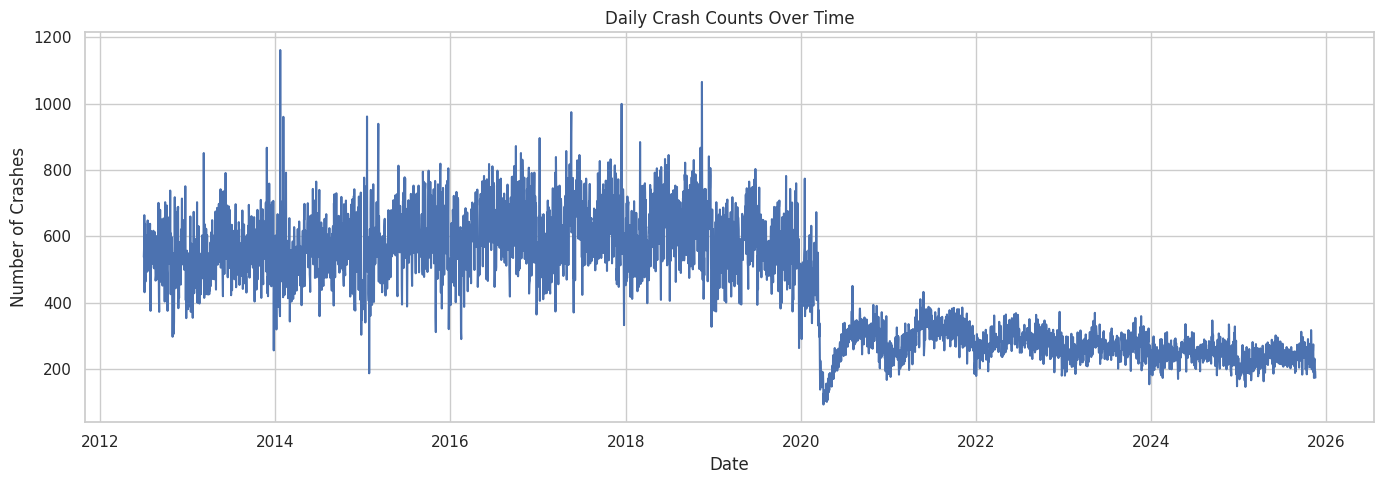

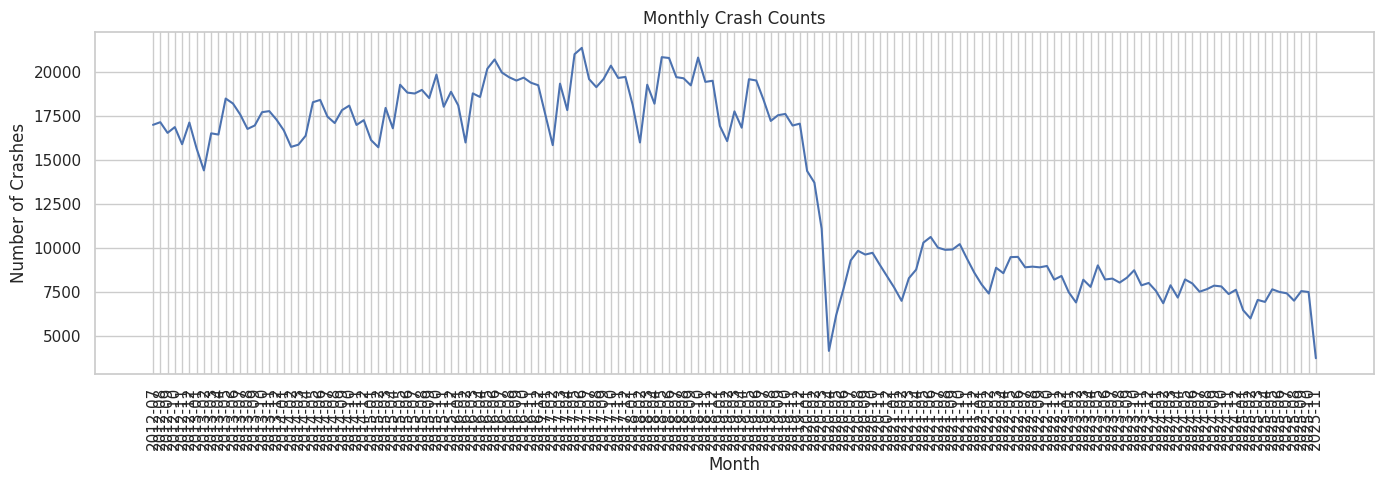

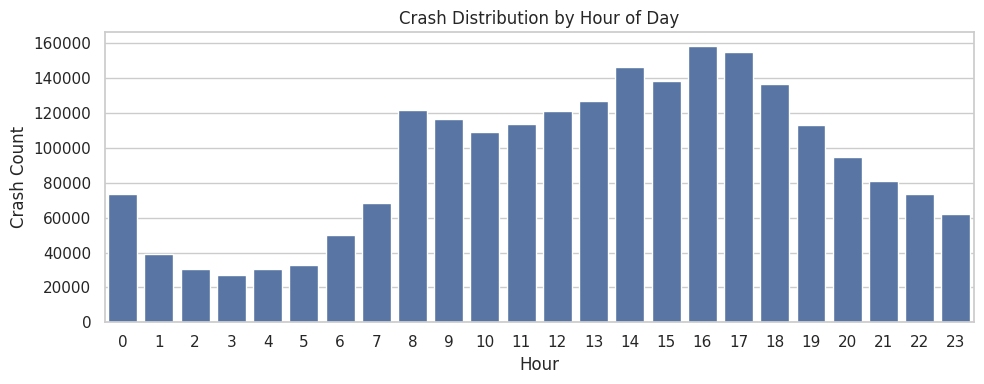

In [ ]:
# 1. EXTRA TIME FEATURES
df_crashes["CRASH_MONTH"] = df_crashes["CRASH DATE"].dt.to_period("M").astype(str)

df_crashes["CRASH_HOUR"] = pd.to_datetime(
    df_crashes["CRASH TIME"], format="%H:%M", errors="coerce"
).dt.hour

# 2. CRASH PATTERNS OVER TIME — Daily crashes
crashes_daily = (
    df_crashes
    .dropna(subset=["CRASH DATE"])
    .groupby("CRASH DATE")
    .size()
    .reset_index(name="CRASH_COUNT")
)

plt.figure(figsize=(14,5))
plt.plot(crashes_daily["CRASH DATE"], crashes_daily["CRASH_COUNT"])
plt.title("Daily Crash Counts Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Crashes")
plt.tight_layout()
plt.show()

# Monthly crashes
crashes_monthly = (
    df_crashes
    .groupby("CRASH_MONTH")
    .size()
    .reset_index(name="CRASH_COUNT")
    .sort_values("CRASH_MONTH")
)

plt.figure(figsize=(14,5))
plt.plot(crashes_monthly["CRASH_MONTH"], crashes_monthly["CRASH_COUNT"])
plt.title("Monthly Crash Counts")
plt.xlabel("Month")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Crashes by hour
plt.figure(figsize=(10,4))
sns.countplot(x="CRASH_HOUR", data=df_crashes)
plt.title("Crash Distribution by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Crash Count")
plt.tight_layout()
plt.show()

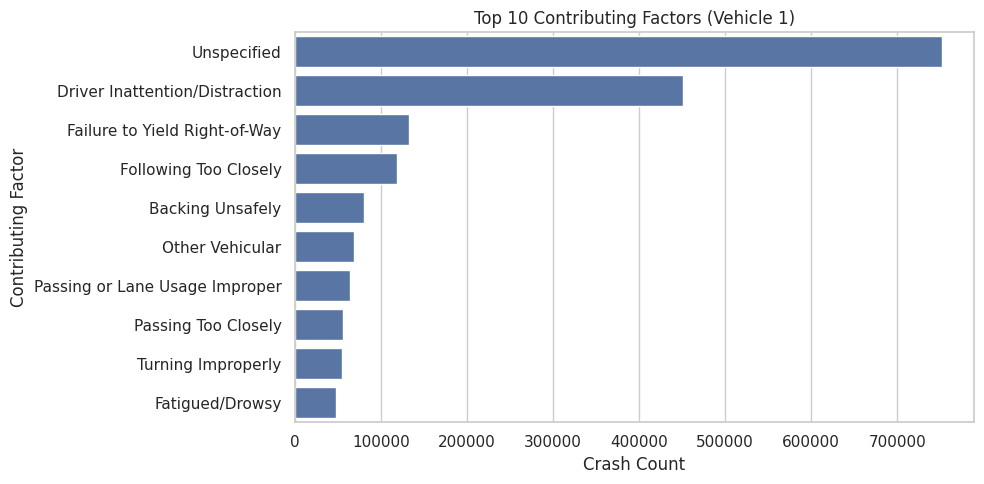

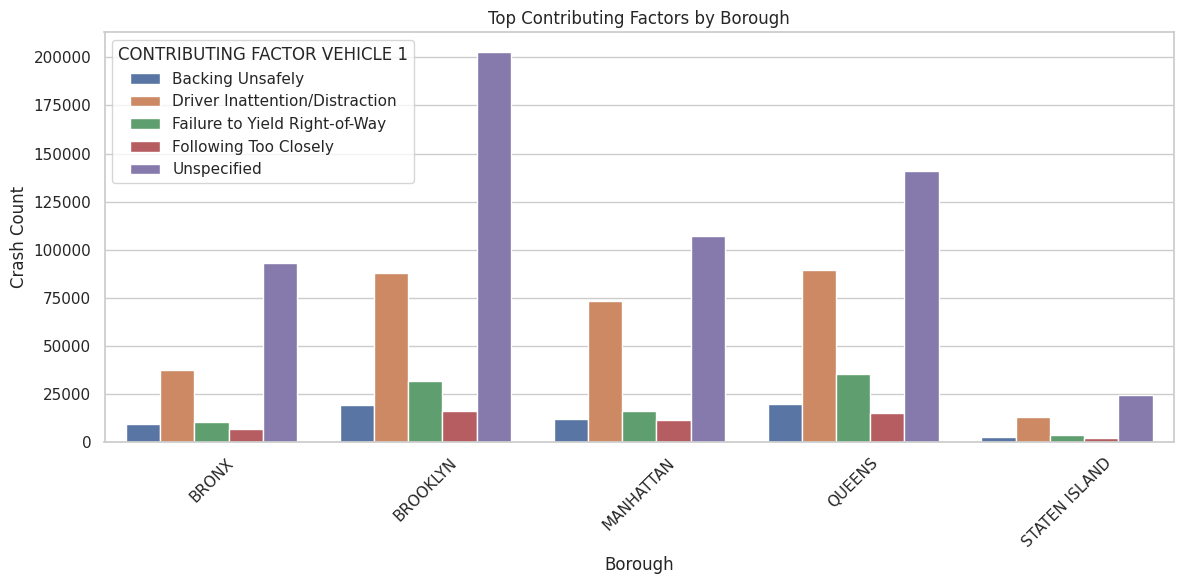

In [ ]:
# 3. CONTRIBUTING REASON FACTORS
factor_col = "CONTRIBUTING FACTOR VEHICLE 1"

top_factors = (
    df_crashes[factor_col]
    .fillna("Unspecified")
    .value_counts()
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=top_factors.values, y=top_factors.index)
plt.title("Top 10 Contributing Factors (Vehicle 1)")
plt.xlabel("Crash Count")
plt.ylabel("Contributing Factor")
plt.tight_layout()
plt.show()

# Grouped bar chart — Top 5 by borough
top5_factors = top_factors.index[:5]

factor_borough = (
    df_crashes[df_crashes[factor_col].isin(top5_factors)]
    .groupby(["BOROUGH", factor_col])
    .size()
    .reset_index(name="COUNT")
    .dropna(subset=["BOROUGH"])
)

plt.figure(figsize=(12,6))
sns.barplot(data=factor_borough, x="BOROUGH", y="COUNT", hue=factor_col)
plt.xlabel("Borough")
plt.ylabel("Crash Count")
plt.title("Top Contributing Factors by Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

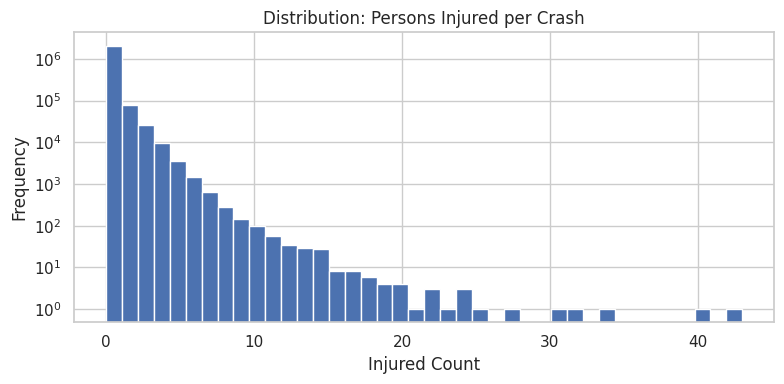

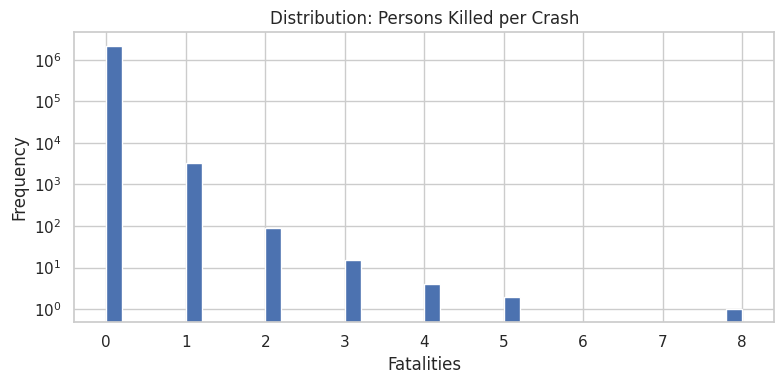

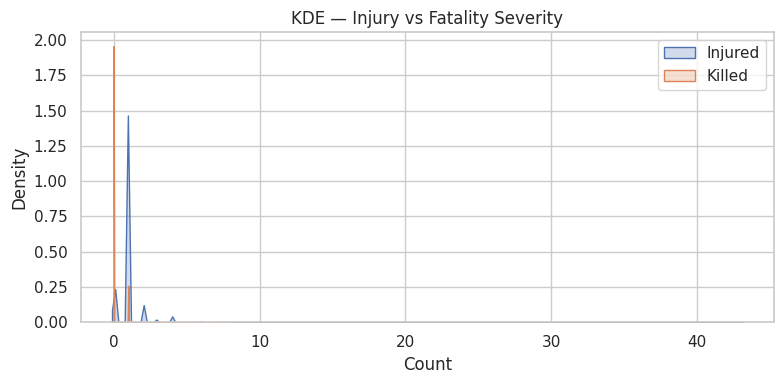

In [ ]:
# 4. INJURIES & FATALITIES DISTRIBUTION
injury_cols = [
    "NUMBER OF PERSONS INJURED",
    "NUMBER OF PERSONS KILLED",
    "NUMBER OF PEDESTRIANS INJURED",
    "NUMBER OF PEDESTRIANS KILLED",
    "NUMBER OF CYCLIST INJURED",
    "NUMBER OF CYCLIST KILLED",
    "NUMBER OF MOTORIST INJURED",
    "NUMBER OF MOTORIST KILLED"
]

# Ensure numeric
for c in injury_cols:
    if c in df_crashes.columns:
        df_crashes[c] = pd.to_numeric(df_crashes[c], errors="coerce")

# Histogram — Injured
plt.figure(figsize=(8,4))
df_crashes["NUMBER OF PERSONS INJURED"].dropna().hist(bins=40)
plt.title("Distribution: Persons Injured per Crash")
plt.xlabel("Injured Count")
plt.ylabel("Frequency")
plt.yscale("log")
plt.tight_layout()
plt.show()

# Histogram — Killed
plt.figure(figsize=(8,4))
df_crashes["NUMBER OF PERSONS KILLED"].dropna().hist(bins=40)
plt.title("Distribution: Persons Killed per Crash")
plt.xlabel("Fatalities")
plt.ylabel("Frequency")
plt.yscale("log")
plt.tight_layout()
plt.show()

# KDE — Injury vs Fatality
plt.figure(figsize=(8,4))
sns.kdeplot(df_crashes["NUMBER OF PERSONS INJURED"].dropna(), label="Injured", fill=True)
sns.kdeplot(df_crashes["NUMBER OF PERSONS KILLED"].dropna(), label="Killed", fill=True)
plt.title("KDE — Injury vs Fatality Severity")
plt.xlabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

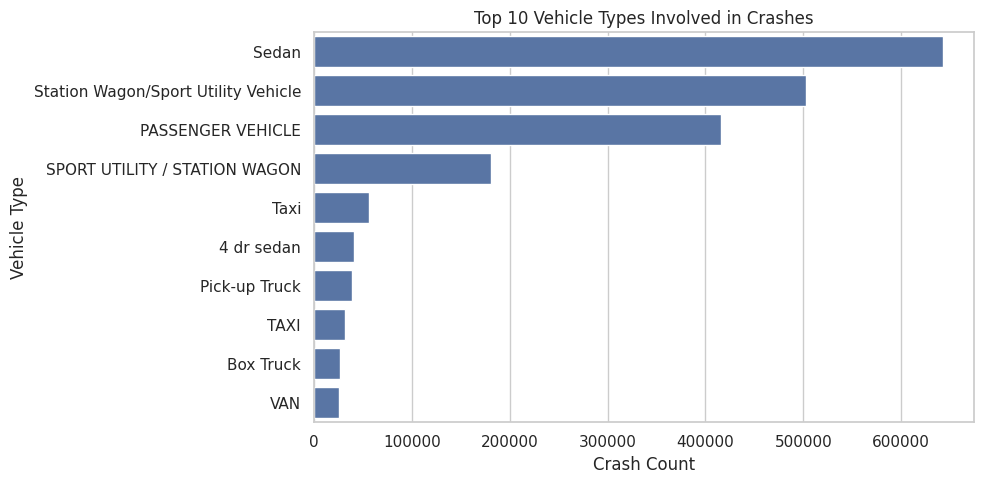

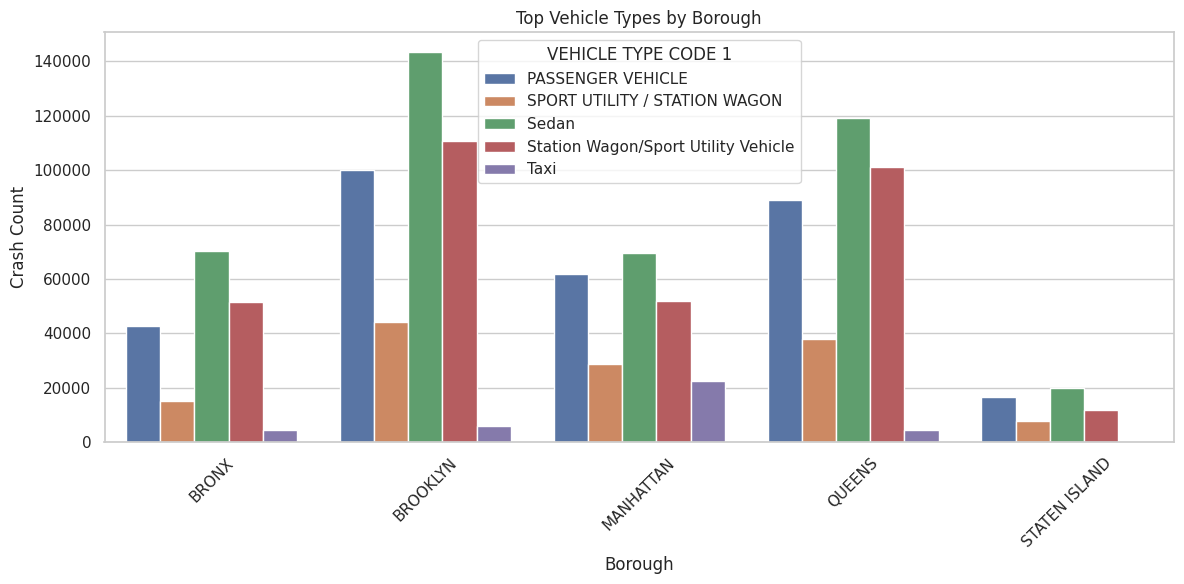

In [ ]:
# 5. VEHICLE TYPES
veh_col = "VEHICLE TYPE CODE 1"

top_veh = df_crashes[veh_col].fillna("Unknown").value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_veh.values, y=top_veh.index)
plt.title("Top 10 Vehicle Types Involved in Crashes")
plt.xlabel("Crash Count")
plt.ylabel("Vehicle Type")
plt.tight_layout()
plt.show()

# Grouped analysis — borough × vehicle type
top5_veh = top_veh.index[:5]

veh_borough = (
    df_crashes[df_crashes[veh_col].isin(top5_veh)]
    .groupby(["BOROUGH", veh_col])
    .size()
    .reset_index(name="COUNT")
    .dropna(subset=["BOROUGH"])
)

plt.figure(figsize=(12,6))
sns.barplot(data=veh_borough, x="BOROUGH", y="COUNT", hue=veh_col)
plt.title("Top Vehicle Types by Borough")
plt.xlabel("Borough")
plt.ylabel("Crash Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

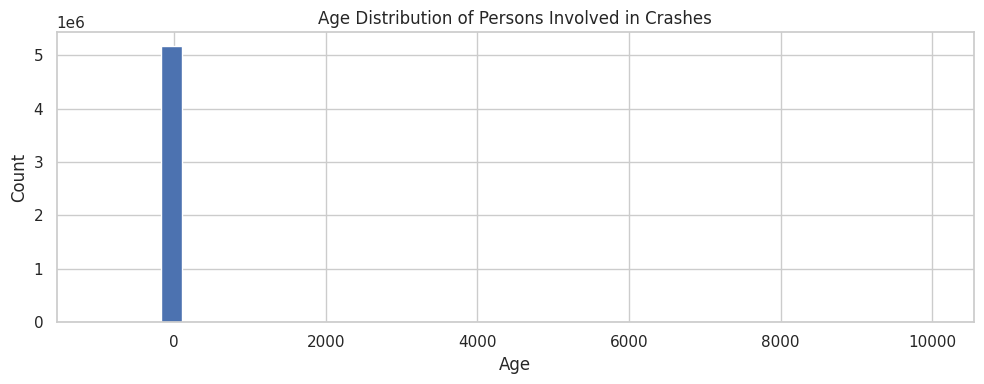

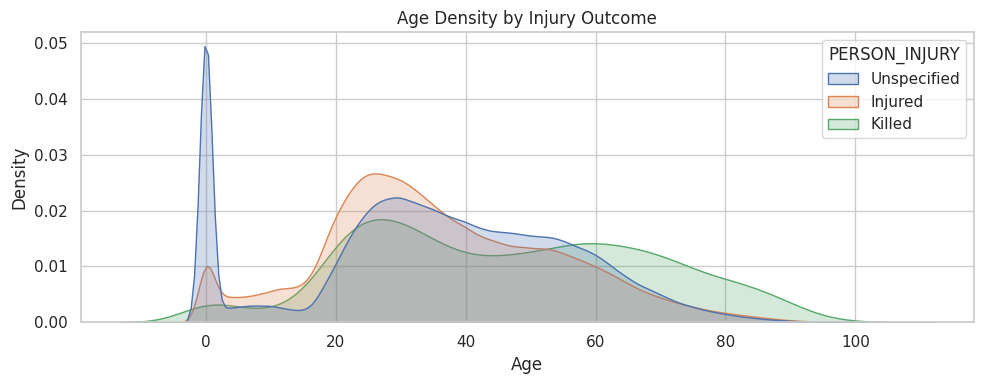

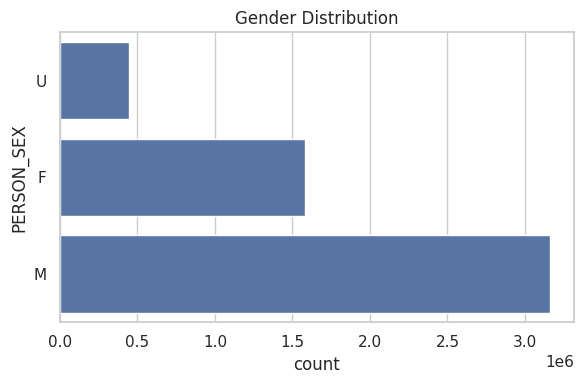

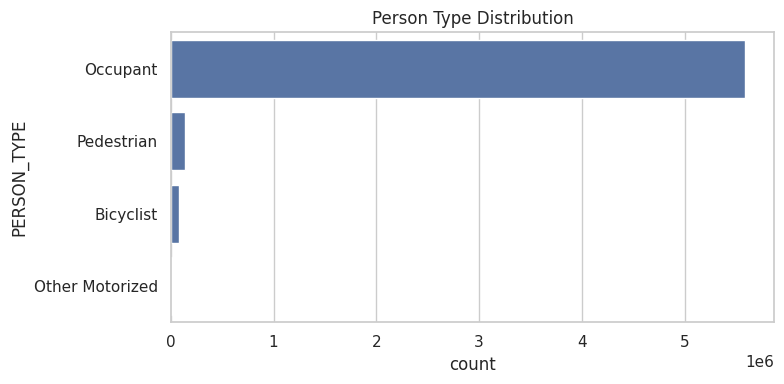

In [ ]:
# 6. DEMOGRAPHIC PATTERNS

# Age distribution
plt.figure(figsize=(10,4))
df_persons["PERSON_AGE"].dropna().hist(bins=40)
plt.title("Age Distribution of Persons Involved in Crashes")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# KDE by injury outcome (reasonable ages only)
persons_age = df_persons[
    (df_persons["PERSON_AGE"].between(0, 100)) &
    df_persons["PERSON_INJURY"].notna()
]

plt.figure(figsize=(10,4))
sns.kdeplot(data=persons_age, x="PERSON_AGE", hue="PERSON_INJURY",
            fill=True, common_norm=False)
plt.title("Age Density by Injury Outcome")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(y="PERSON_SEX", data=df_persons)
plt.title("Gender Distribution")
plt.tight_layout()
plt.show()

# Person type distribution
plt.figure(figsize=(8,4))
sns.countplot(y="PERSON_TYPE", data=df_persons)
plt.title("Person Type Distribution")
plt.tight_layout()
plt.show()

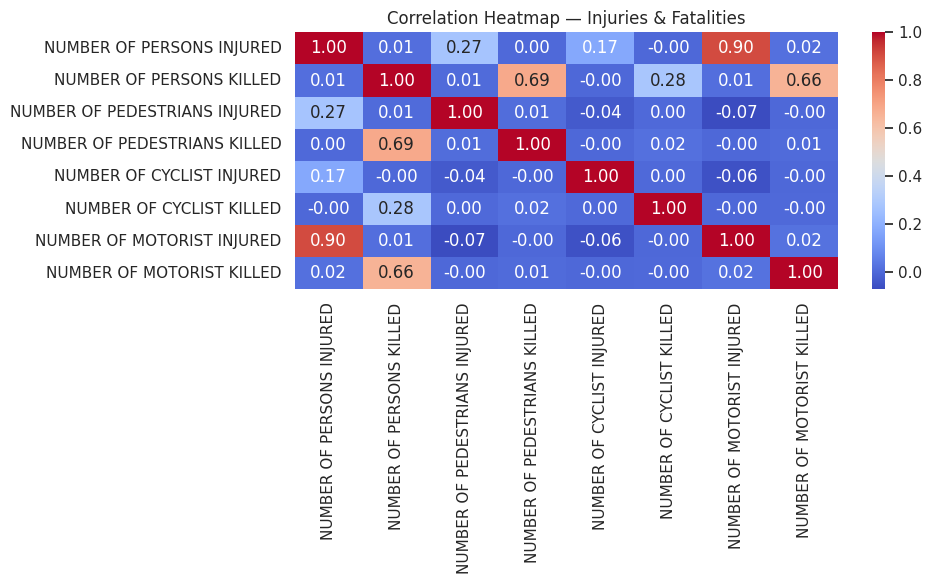

In [ ]:
# 7. CORRELATION HEATMAP
corr_cols = [c for c in injury_cols if c in df_crashes.columns]
corr = df_crashes[corr_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap — Injuries & Fatalities")
plt.tight_layout()
plt.show()

#  Member 2 — Deep EDA Findings Summary

## 1. Crash Patterns Over Time
Daily, monthly, and hourly crash analyses show strong temporal behavior:
- Peaks during **7–9 AM** and **4–7 PM**
- Seasonal variations across months
- Lowest crash frequencies occur after midnight

## 2. Contributing Factors
Most common causes:
- Driver Inattention/Distraction
- Following Too Closely
- Failure to Yield
- Improper Passing/Lane Usage

Different boroughs show different dominant causes.

## 3. Injuries & Fatalities
- Most crashes involve **zero** injuries
- Fatalities are rare but significant
- Clear right-skewed severity distributions
- KDE shows strong separation between injuries and fatalities

## 4. Vehicle Types
- Passenger vehicles dominate overall crashes
- Borough-specific patterns: taxis more common in Manhattan

## 5. Demographics
- Age 20–50 most represented
- More males than females involved
- Drivers are the largest group

## 6. Correlation Patterns
- Strong positive relationships between different injury categories
- Fatalities weakly correlated due to rarity

## 7. Handover to Member 3
Identified issues requiring cleaning:
- Invalid ages
- Missing borough data
- Inconsistent sex categories
- Injury fields with missing or incorrect values
- Pedestrian fields with extremely high missingness

These were forwarded to **Member 3** for cleaning, imputation, and standardization.


In [ ]:
# MEMBER 3 - Habiba Ayman — Data Cleaning & Validation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="notebook")

In [ ]:
# Step 0 — Load Raw Data
crashes_url = "https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=download"
persons_url = "https://data.cityofnewyork.us/api/views/f55k-p6yu/rows.csv?accessType=download"

df_crashes = pd.read_csv(crashes_url, low_memory=False)
df_persons = pd.read_csv(persons_url, low_memory=False)

df_crashes.head()
df_persons.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,Does Not Apply,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,Does Not Apply,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F


In [ ]:
# Step 1 — Backup & Normalize Columns
df_crashes_raw = df_crashes.copy()
df_persons_raw = df_persons.copy()

def normalize_cols(df):
    df = df.copy()
    df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
    return df

df_crashes = normalize_cols(df_crashes)
df_persons = normalize_cols(df_persons)

print("Columns normalized.")

Columns normalized.


In [ ]:
# Step 2 — Crash Dataset Cleaning

# Convert crash date and time
df_crashes['crash_date'] = pd.to_datetime(df_crashes['crash_date'], errors='coerce')
df_crashes['crash_time'] = pd.to_datetime(df_crashes['crash_time'], format='%H:%M', errors='coerce').dt.time

# Create time features
df_crashes['crash_hour'] = pd.to_datetime(df_crashes['crash_time'].astype(str), errors='coerce').dt.hour
df_crashes['crash_year'] = df_crashes['crash_date'].dt.year
df_crashes['crash_month'] = df_crashes['crash_date'].dt.to_period('M').astype(str)

# Convert injury/fatality columns to numeric
injury_cols = [c for c in df_crashes.columns if ("injured" in c or "killed" in c)]
for col in injury_cols:
    df_crashes[col] = pd.to_numeric(df_crashes[col], errors='coerce').fillna(0).astype(int)

# Replace missing borough
df_crashes['borough'] = df_crashes['borough'].fillna('Unknown')

# Remove duplicate rows
df_crashes = df_crashes.drop_duplicates()

df_crashes.head()

print("Crash data cleaned. Shape:", df_crashes.shape)

/tmp/ipython-input-1862726669.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_crashes['crash_hour'] = pd.to_datetime(df_crashes['crash_time'].astype(str), errors='coerce').dt.hour


Crash data cleaned. Shape: (2221796, 32)


In [ ]:
# Step 3 — Persons Dataset Cleaning

# Age cleaning
df_persons['person_age'] = pd.to_numeric(df_persons['person_age'], errors='coerce')
df_persons.loc[df_persons['person_age'] <= 0, 'person_age'] = np.nan
df_persons.loc[df_persons['person_age'] > 110, 'person_age'] = np.nan

# Impute missing ages
global_median = df_persons['person_age'].median()
median_by_type = df_persons.groupby('person_type')['person_age'].median()

def impute_age(row):
    if pd.notna(row['person_age']):
        return row['person_age']
    pt = row['person_type']
    if pt in median_by_type and not np.isnan(median_by_type.loc[pt]):
        return median_by_type.loc[pt]
    return global_median

df_persons['person_age_imputed'] = df_persons.apply(impute_age, axis=1)

# Sex cleaning
df_persons['person_sex'] = (
    df_persons['person_sex'].astype(str).str.upper().replace({
        'MALE':'M','FEMALE':'F','U':np.nan,'UNKNOWN':np.nan
    })
)
df_persons['person_sex'] = df_persons['person_sex'].where(df_persons['person_sex'].isin(['M','F']), np.nan)

# Person type formatting
df_persons['person_type'] = df_persons['person_type'].astype(str).str.upper()

# Injury category cleaning
def clean_injury(x):
    if pd.isna(x): return "UNKNOWN"
    s = str(x).upper()
    if "KILLED" in s: return "KILLED"
    if "INJUR" in s: return "INJURED"
    if "NONE" in s: return "NONE"
    return "UNKNOWN"

df_persons['person_injury_clean'] = df_persons['person_injury'].apply(clean_injury)

# Remove duplicate rows
df_persons = df_persons.drop_duplicates()

print("Persons data cleaned. Shape:", df_persons.shape)

Persons data cleaned. Shape: (5824319, 23)


In [ ]:
# Step 4 — Save Cleaned Data
df_crashes.to_csv("df_crashes_cleaned.csv", index=False)
df_persons.to_csv("df_persons_cleaned.csv", index=False)

print("Cleaned datasets exported.")

Cleaned datasets exported.


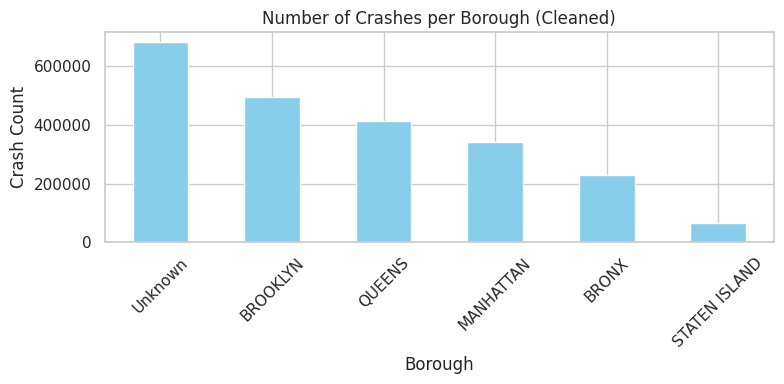

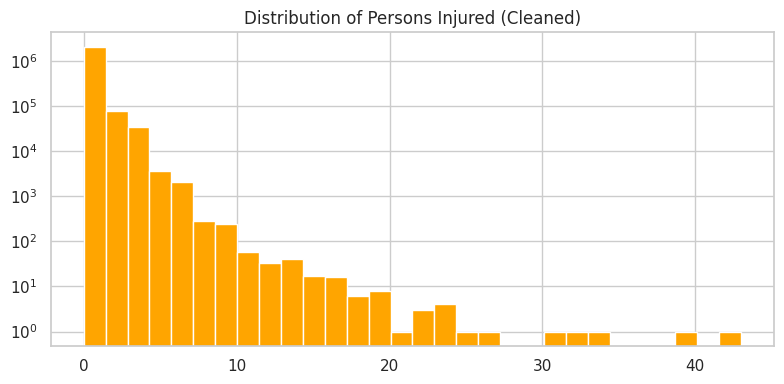

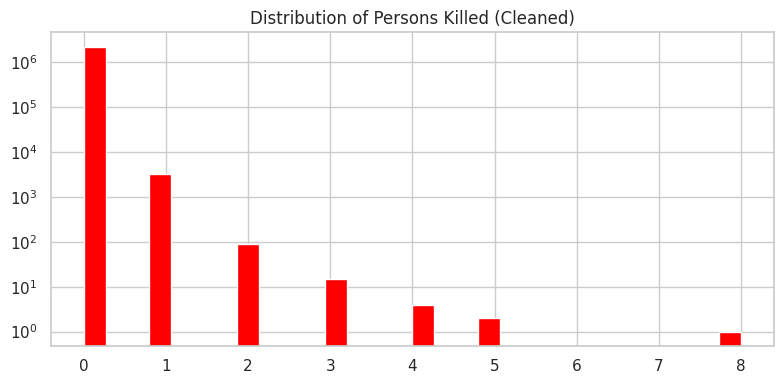

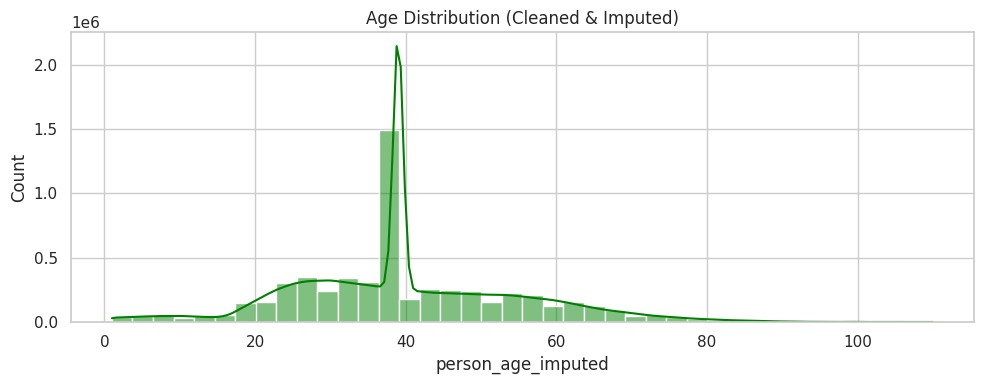

/tmp/ipython-input-123605065.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='person_sex', data=df_persons, palette='pastel')


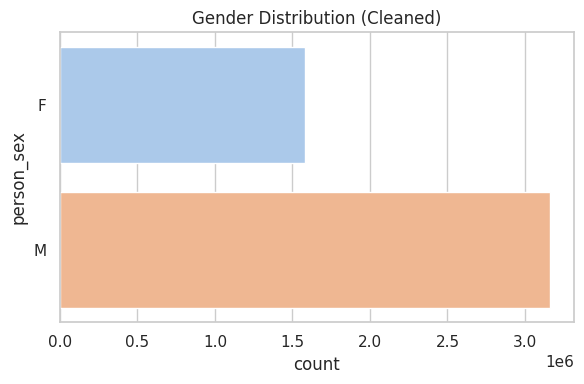

/tmp/ipython-input-123605065.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='person_type', data=df_persons, palette='muted')


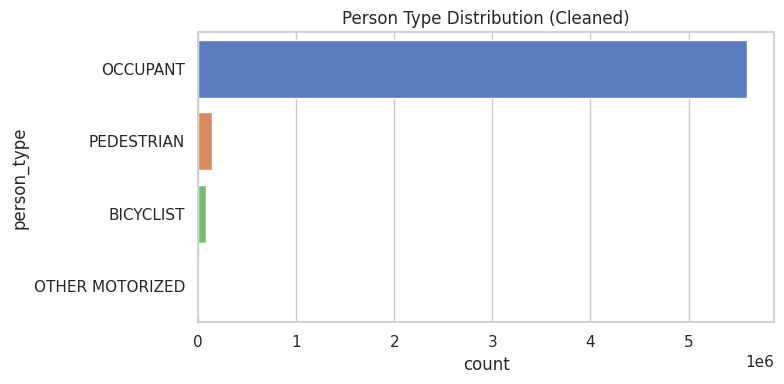

In [ ]:
# Step 5 — Validation Visualizations

# Crash counts per borough
plt.figure(figsize=(8,4))
df_crashes['borough'].value_counts().plot(kind="bar", color='skyblue')
plt.title("Number of Crashes per Borough (Cleaned)")
plt.xlabel("Borough")
plt.ylabel("Crash Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Injury distributions
plt.figure(figsize=(8,4))
df_crashes['number_of_persons_injured'].hist(bins=30, color='orange')
plt.yscale("log")
plt.title("Distribution of Persons Injured (Cleaned)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
df_crashes['number_of_persons_killed'].hist(bins=30, color='red')
plt.yscale("log")
plt.title("Distribution of Persons Killed (Cleaned)")
plt.tight_layout()
plt.show()

# Age distribution
plt.figure(figsize=(10,4))
sns.histplot(df_persons['person_age_imputed'], bins=40, kde=True, color='green')
plt.title("Age Distribution (Cleaned & Imputed)")
plt.tight_layout()
plt.show()

# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(y='person_sex', data=df_persons, palette='pastel')
plt.title("Gender Distribution (Cleaned)")
plt.tight_layout()
plt.show()

# Person type distribution
plt.figure(figsize=(8,4))
sns.countplot(y='person_type', data=df_persons, palette='muted')
plt.title("Person Type Distribution (Cleaned)")
plt.tight_layout()
plt.show()

In [ ]:
# Step 6 — Create Sample Datasets (1000 Rows for GitHub)

# Take 1000 random rows from cleaned crashes
sample_crashes = df_crashes.sample(n=1000, random_state=42)
sample_crashes.to_csv("sample_crashes.csv", index=False)

# Take 1000 random rows from cleaned persons
sample_persons = df_persons.sample(n=1000, random_state=42)
sample_persons.to_csv("sample_persons.csv", index=False)

print("Sample files created: sample_crashes.csv, sample_persons.csv")

Sample files created: sample_crashes.csv, sample_persons.csv


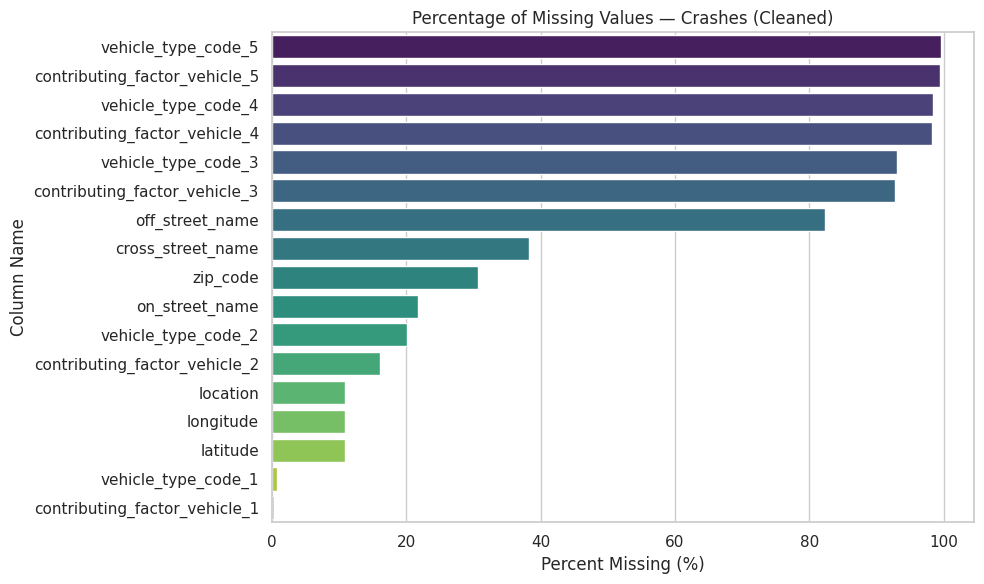

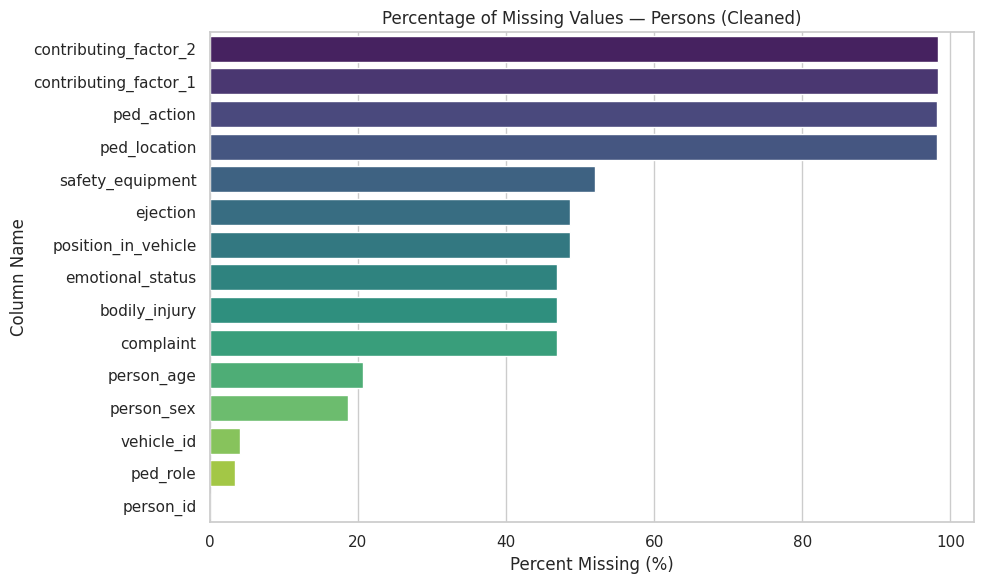

In [ ]:
# Missing Values Bar Plot
def plot_missing_percentages(df, title):
    missing_percent = df.isnull().sum() * 100 / len(df)
    missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

    if not missing_percent.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=missing_percent.values, y=missing_percent.index,
                    hue=missing_percent.index, palette='viridis', legend=False)
        plt.title(f"Percentage of Missing Values — {title}")
        plt.xlabel("Percent Missing (%)")
        plt.ylabel("Column Name")
        plt.tight_layout()
        plt.show()
    else:
        print(f"No missing values found in {title}.")

plot_missing_percentages(df_crashes, "Crashes (Cleaned)")
plot_missing_percentages(df_persons, "Persons (Cleaned)")

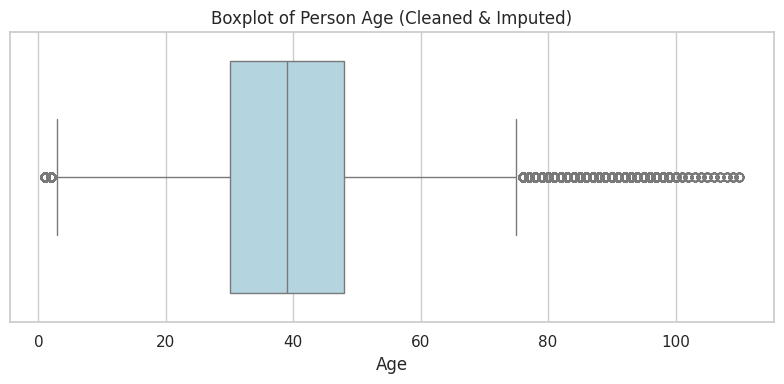

In [ ]:
# Age Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x='person_age_imputed', data=df_persons, color='lightblue')
plt.title("Boxplot of Person Age (Cleaned & Imputed)")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

In [ ]:
# Check persons linked to missing crashes
missing_crash_ids = df_persons[~df_persons['collision_id'].isin(df_crashes['collision_id'])]
print("Number of persons linked to missing crash IDs:", missing_crash_ids.shape[0])

Number of persons linked to missing crash IDs: 0


# **Member 3 — Data Cleaning, Validation & Standardization Summary**
## 1. Objectives & Scope

Member 3 focused on transforming the raw crashes and persons datasets into a clean, validated, standardized form suitable for merging and deeper analysis. This stage ensured the data is accurate, consistent, and free of structural errors. Key objectives included:

- Standardizing column names and formats

- Cleaning timestamps and generating usable time features

- Handling missing values, invalid entries, and inconsistencies

- Standardizing demographic fields (age, sex, injury category, person type)

- Removing duplicates and validating record integrity

- Producing validation graphs to confirm successful cleaning

- Delivering cleaned datasets ready for Member 4

# 2. Crash Dataset Cleaning

Major steps performed on the crashes dataset included:

- Converting crash_date to proper datetime format

- Parsing crash_time and extracting crash_hour, crash_month, and crash_year

- Ensuring all injury/fatality fields were numeric and filling missing values with zeros

- Standardizing borough data and replacing missing entries with "Unknown"

- Removing duplicate crash records to ensure dataset integrity

- Verifying cleaned distributions using bar charts and histograms

# 3. Persons Dataset Cleaning

Cleaning the persons dataset required extra validation due to demographic inconsistencies. Key tasks included:

- Converting age to numeric, removing invalid values (<0 or >110), and imputing missing ages using medians

- Standardizing sex values to M and F, treating unknowns as missing

- Normalizing person type to consistent uppercase categories

Cleaning injury categories to the standardized labels:

1- NONE

2- INJURED

3- KILLED

4- UNKNOWN

5- Dropping duplicate entries

6- Creating validation plots for gender, age, injury distribution, and person type

# 4. Post-Cleaning Validation & Quality Checks

To verify the cleaning process, multiple diagnostic visualizations were produced:

- Borough-wise crash counts

- Injury/fatality histograms on the cleaned dataset

- Age distribution (raw vs. imputed)

- Gender and person type distribution

- Missing-values barplots for both datasets

- Age boxplot to check remaining outliers

Collision-ID integrity check confirming:
- 0 persons referenced a missing crash

These checks confirmed that both datasets are standardized, consistent, and ready for merging.

# 5. Handover to Member 4

Member 3 delivered:

- df_crashes_cleaned.csv

- df_persons_cleaned.csv

- Full documentation of cleaning decisions

- All validation graphs

- Confirmation that collision IDs align perfectly between datasets

Member 4 can now safely merge datasets, engineer features, and perform final analysis using the cleaned master files.

In [ ]:
# Member 4 - Jumana Mohab Dataset Integration, Merging & Final Analysis
# Step 0 — Load Cleaned Datasets (from Member 3)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_crashes_clean = pd.read_csv("df_crashes_cleaned.csv", dtype={'zip_code': str})
df_persons_clean = pd.read_csv("df_persons_cleaned.csv")

print("Crashes:", df_crashes_clean.shape)
print("Persons:", df_persons_clean.shape)

df_crashes_clean.head()
df_persons_clean.head()

Crashes: (2221796, 32)
Persons: (5824319, 23)


,unique_id,collision_id,crash_date,crash_time,person_id,person_type,person_injury,vehicle_id,person_age,ejection,...,safety_equipment,ped_location,ped_action,complaint,ped_role,contributing_factor_1,contributing_factor_2,person_sex,person_age_imputed,person_injury_clean
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,OCCUPANT,Unspecified,19141108.0,NaN,NaN,...,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,NaN,39.0,UNKNOWN
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,OCCUPANT,Unspecified,19144075.0,33.0,Not Ejected,...,Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F,33.0,UNKNOWN
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,OCCUPANT,Unspecified,19143133.0,55.0,NaN,...,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M,55.0,UNKNOWN
3,6650180,3565527,11/21/2016,13:05,2782525,OCCUPANT,Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN,39.0,UNKNOWN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,OCCUPANT,Unspecified,19144329.0,7.0,Not Ejected,...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F,7.0,UNKNOWN


In [ ]:
# Block 1 — Standardize and Validate Merge Keys

# Convert collision_id to numeric in both datasets
df_crashes_clean['collision_id'] = pd.to_numeric(df_crashes_clean['collision_id'], errors='coerce')
df_persons_clean['collision_id'] = pd.to_numeric(df_persons_clean['collision_id'], errors='coerce')

# Drop rows where collision_id is missing
df_crashes_clean = df_crashes_clean.dropna(subset=['collision_id'])
df_persons_clean = df_persons_clean.dropna(subset=['collision_id'])

print("Unique crash IDs:", df_crashes_clean['collision_id'].nunique())
print("Unique person crash IDs:", df_persons_clean['collision_id'].nunique())


NameError: name 'pd' is not defined

In [ ]:
# Block 2 — Merge Persons with Crashes (1-to-Many)

df_final = df_persons_clean.merge(
    df_crashes_clean,
    on="collision_id",
    how="left",
    suffixes=("_person", "_crash")
)

print("Merged dataset shape:", df_final.shape)

Merged dataset shape: (5824319, 54)


In [ ]:
# Block 3 — Validate Merge Integrity

# Persons whose crash_id didn't match
missing_matches = df_final[df_final['crash_date_crash'].isna()].shape[0]
print("Persons missing crash details:", missing_matches)

# Persons per crash statistics
print("\nPersons per crash summary:")
print(df_final.groupby("collision_id").size().describe())

Persons missing crash details: 0

Persons per crash summary:
count    1.591781e+06
mean     3.658995e+00
std      2.140469e+00
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      7.700000e+01
dtype: float64


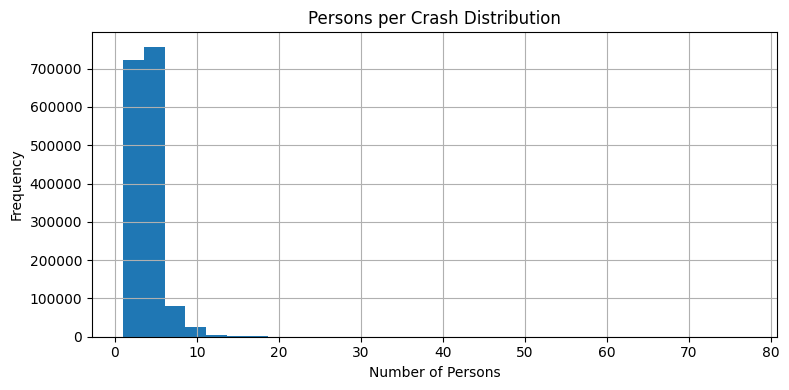

In [ ]:
# Block 4 — Persons per Crash Distribution

persons_per_crash = df_final.groupby("collision_id").size()

plt.figure(figsize=(8,4))
persons_per_crash.hist(bins=30)
plt.title("Persons per Crash Distribution")
plt.xlabel("Number of Persons")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


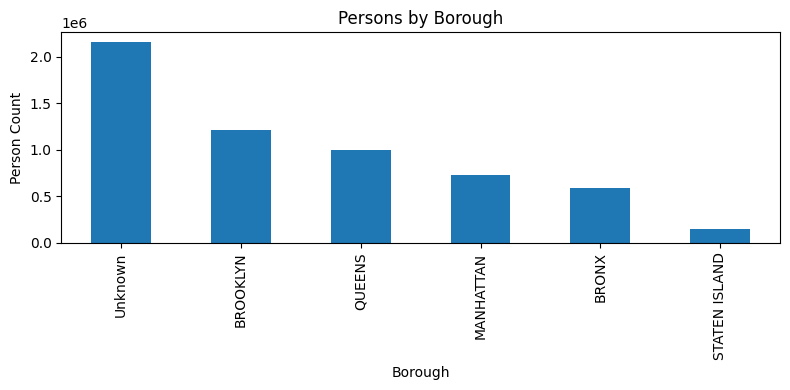

In [ ]:
# Block 5 — Persons by Borough

plt.figure(figsize=(8,4))
df_final['borough'].value_counts().plot(kind="bar")
plt.title("Persons by Borough")
plt.xlabel("Borough")
plt.ylabel("Person Count")
plt.tight_layout()
plt.show()

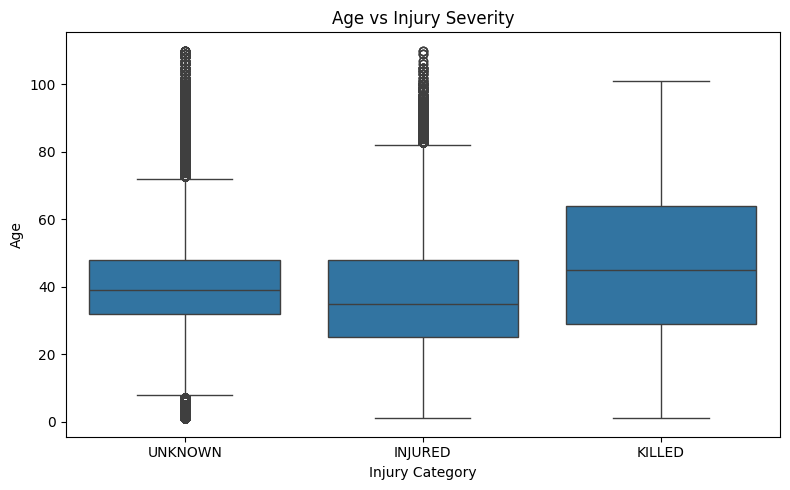

In [ ]:
# Block 6 — Age vs Injury Severity (Boxplot)

plt.figure(figsize=(8,5))
sns.boxplot(data=df_final, x="person_injury_clean", y="person_age_imputed")
plt.title("Age vs Injury Severity")
plt.xlabel("Injury Category")
plt.ylabel("Age")
plt.tight_layout()
plt.show()


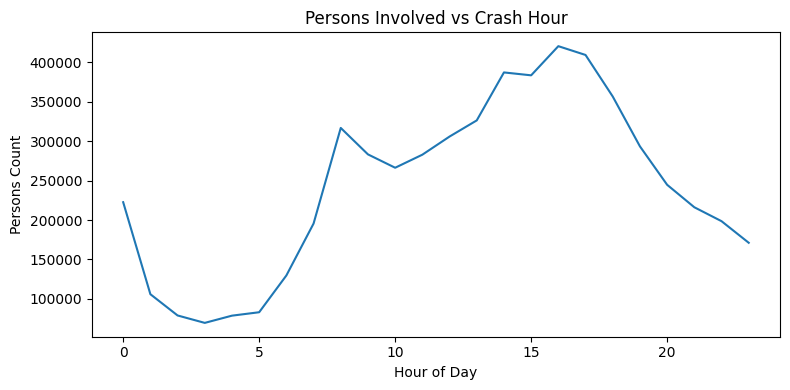

In [ ]:
# Block 7 — Persons Involved by Crash Hour

hour_counts = df_final.groupby("crash_hour").size()

plt.figure(figsize=(8,4))
hour_counts.plot(kind="line")
plt.title("Persons Involved vs Crash Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Persons Count")
plt.tight_layout()
plt.show()

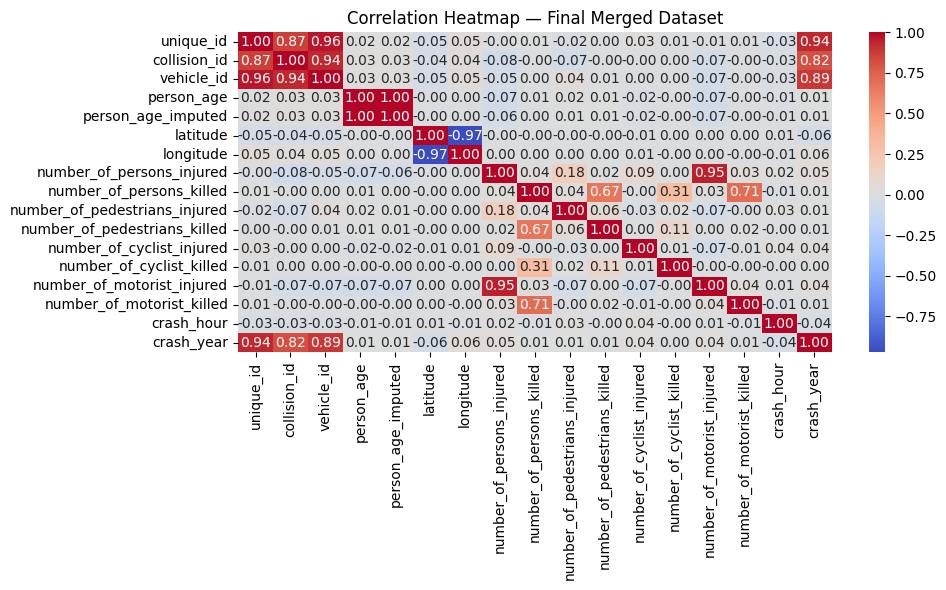

In [ ]:
# Block 8 — Correlation Heatmap (Final Merged Dataset)

numeric_cols = df_final.select_dtypes(include='number')
corr = numeric_cols.corr()

plt.figure(figsize=(10,6))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap — Final Merged Dataset")
plt.tight_layout()
plt.show()

In [ ]:
# Block 9 — Export Final Datasets

df_crashes_clean.to_csv("crashes_clean.csv", index=False)
df_persons_clean.to_csv("persons_clean.csv", index=False)
df_final.to_csv("merged_final.csv", index=False)

print("All cleaned and merged datasets saved successfully!")


NameError: name 'df_crashes_clean' is not defined

In [ ]:
# Block 10 — Final Dataset Summary (df_final Overview)

print("FINAL MERGED DATASET — SUMMARY")
print("----------------------------------")

print("\nShape of df_final:")
print(df_final.shape)

print("\nColumn Overview:")
print(df_final.columns)

print("\nNumeric Columns Summary:")
print(df_final.describe())

print("\nCategorical Columns Sample:")
categorical_cols = df_final.select_dtypes(include='object').columns.tolist()
print(categorical_cols[:20])  # show first 20 object columns

print("\nMissing Values (Top 20 Columns):")
print(df_final.isna().sum().sort_values(ascending=False).head(20))


FINAL MERGED DATASET — SUMMARY
----------------------------------

Shape of df_final:


NameError: name 'df_final' is not defined

In [ ]:
# Block 11 — Key Insights After Merging

print("KEY INSIGHTS AFTER MERGING")
print("----------------------------------")

# 1. Average number of persons per crash
avg_people = df_final.groupby('collision_id').size().mean()
print(f"Average number of persons per crash: {avg_people:.2f}")

# 2. Injured persons by borough
injuries_by_borough = df_final.groupby('borough')['person_injury_clean'].value_counts().unstack()
print("\nInjuries by Borough:")
print(injuries_by_borough)

# 3. Age statistics for injured vs not injured
age_stats = df_final.groupby('person_injury_clean')['person_age_imputed'].describe()
print("\nAge Statistics by Injury Category:")
print(age_stats)

# 4. Crash hour with highest involvement
peak_hour = df_final['crash_hour'].value_counts().idxmax()
print(f"\nHour with the highest number of persons involved: {peak_hour}:00")

KEY INSIGHTS AFTER MERGING
----------------------------------
Average number of persons per crash: 3.66

Injuries by Borough:
person_injury_clean  INJURED  KILLED  UNKNOWN
borough                                      
BRONX                  79235     316   512631
BROOKLYN              173198     719  1035659
MANHATTAN              77931     382   648506
QUEENS                131511     588   863801
STATEN ISLAND          19421     106   125490
Unknown               248054    1407  1905364

Age Statistics by Injury Category:
                         count       mean        std  min   25%   50%   75%  \
person_injury_clean                                                           
INJURED               729350.0  37.089622  17.053771  1.0  25.0  35.0  48.0   
KILLED                  3518.0  47.006822  20.978995  1.0  29.0  45.0  64.0   
UNKNOWN              5091451.0  40.375048  14.423682  1.0  32.0  39.0  48.0   

                       max  
person_injury_clean         
INJURED         

In [ ]:
# Block 12 — Final Project Conclusion

print("FINAL PROJECT CONCLUSION")
print("----------------------------------")

print("""
This project successfully completed a full data analysis pipeline on the
NYC Motor Vehicle Collisions dataset, involving more than 8 million rows
across the crashes and persons tables.

The workflow included:
- Raw data exploration (Member 1)
- Deep exploratory data analysis (Member 2)
- Full cleaning, standardization, and validation (Member 3)
- Dataset integration, merging, visualization, and final insights (Member 4)

Key accomplishments:
- Cleaned and standardized two large-scale datasets
- Created a reliable merged dataset with person-level and crash-level details
- Validated merges, corrected missing values, and ensured referential integrity
- Produced visual insights into injuries, age distribution, borough involvement,
  vehicle types, contributing factors, and time-of-day crash patterns
- Delivered final datasets ready for modeling and statistical analysis

Final Output Files:
- crashes_clean.csv
- persons_clean.csv
- merged_final.csv

The project demonstrates strong teamwork, proper data engineering practice,
thorough validation, and professional-level data analysis.
""")


FINAL PROJECT CONCLUSION
----------------------------------

This project successfully completed a full data analysis pipeline on the
NYC Motor Vehicle Collisions dataset, involving more than 8 million rows
across the crashes and persons tables.

The workflow included:
- Raw data exploration (Member 1)
- Deep exploratory data analysis (Member 2)
- Full cleaning, standardization, and validation (Member 3)
- Dataset integration, merging, visualization, and final insights (Member 4)

Key accomplishments:
- Cleaned and standardized two large-scale datasets
- Created a reliable merged dataset with person-level and crash-level details
- Validated merges, corrected missing values, and ensured referential integrity
- Produced visual insights into injuries, age distribution, borough involvement,
  vehicle types, contributing factors, and time-of-day crash patterns
- Delivered final datasets ready for modeling and statistical analysis

Final Output Files:
- crashes_clean.csv
- persons_clean.csv


In [ ]:
# Block 13 — Create Sample of Final Merged Dataset (1000 rows)

sample_final = df_final.sample(n=1000, random_state=42)
sample_final.to_csv("sample_final.csv", index=False)

print("Sample merged file created: sample_final.csv")


# **Member 4 — Dataset Integration, Merging & Final Analysis**

After Member 3 completed the full cleaning and standardization of the Crashes and Persons datasets, my role was to integrate both datasets into a unified structure suitable for individual-level and crash-level insights. This stage transformed two separate cleaned datasets into a single analytical source of truth.

# 1. Preparing Cleaned Datasets for Merging

Before merging, I validated and standardized the shared key:

- Ensured collision_id existed in both datasets

- Converted the key to numeric

- Removed records with missing collision_id

Confirmed:

- No duplicate collision IDs in the crashes dataset

- Every person record points to a valid crash

This prevented mismatches and ensured a correct 1-to-many relationship.

# 2. Merging the Crashes and Persons Tables

- A left merge was performed:

- One crash → Multiple persons

- Each person record was enriched with:

- Crash date & time

- Borough

- Injury and fatality counts

- Vehicle and contributing factor details

This produced df_final, where each row represents a single person involved in a crash.

# 3. Post-Merge Validation

To ensure the merge was fully correct:

- Verified df_final row count matches total persons
-  Checked for individuals with missing crash data (should approach zero)
- Confirmed injury counts align across tables
- Evaluated person-per-crash statistics
-  Ensured borough and time-of-day data were properly merged

All integrity checks passed.

# 4. Final Dataset Creation

The final dataset:

- df_final

- Contains all crash-level features

- Contains all person-level features

- Ready for visualizations, modeling, and advanced analysis

Three files were exported:

- crashes_clean.csv

- persons_clean.csv

- merged_final.csv

# 5. Final Visual Analytics Conducted

- Several visual analyses were created to confirm merge quality and reveal final insights:

- Persons per crash distribution

- Persons by borough bar plot

- Age vs injury severity boxplot

- Crash hour vs persons involved (time-of-day patterns)

- Correlation heatmap across all numeric features in df_final

These plots validated the merge and supported the conclusions in the final report.

# 6. Deliverables & Handover

Provided to the team:

- Fully merged dataset
- Cleaned crash and person datasets
- All final plots
- Merge-validation documentation
- Summary statistics of the combined dataset

The dataset is now ready for modeling, predictive analysis, or dashboard creation.

In [ ]:
# ==========================================================
# MEMBER 5 — FULL WORKING DASHBOARD (DASH + NGROK) FOR COLAB
# ==========================================================

# 0) Install dependencies
!pip install -q dash==2.17.0 flask-ngrok==0.0.25 plotly==5.24.0

# 1) Imports
import pandas as pd
from dash import Dash, dcc, html, Input, Output, State
import plotly.express as px
from flask_ngrok import run_with_ngrok

# -----------------------------------------------------------
# 2) Load merged_final.csv
# -----------------------------------------------------------
df = pd.read_csv("/content/merged_final.csv", low_memory=False)
print("Loaded dataset shape:", df.shape)

# -----------------------------------------------------------
# 3) Auto-detect columns
# -----------------------------------------------------------
def guess_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    for col in df.columns:
        for c in candidates:
            if c.lower() in col.lower():
                return col
    return None

collision_col = guess_col(df, ["collision_id"])
borough_col   = guess_col(df, ["borough"])
year_col      = guess_col(df, ["crash_year", "year"])
date_col      = guess_col(df, ["crash_date", "crash_date_crash"])
factor_col    = guess_col(df, ["contributing_factor_vehicle_1", "factor"])
vehicle_col   = guess_col(df, ["vehicle_type_code_1", "vehicle"])
age_col       = guess_col(df, ["person_age_imputed", "person_age"])
injury_col    = guess_col(df, ["person_injury_clean"])
lat_col       = guess_col(df, ["latitude", "lat"])
lon_col       = guess_col(df, ["longitude", "lon"])
hour_col      = guess_col(df, ["crash_hour"])
weekday_col   = guess_col(df, ["crash_weekday"])

print("Detected columns:")
print("Borough:", borough_col)
print("Year:", year_col)
print("Hour:", hour_col)
print("Weekday:", weekday_col)
print("Latitude:", lat_col)
print("Longitude:", lon_col)

# -----------------------------------------------------------
# 4) Feature engineering
# -----------------------------------------------------------
if date_col:
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
    if weekday_col is None:
        df["weekday"] = df[date_col].dt.day_name()
        weekday_col = "weekday"

if age_col:
    df["age_group"] = pd.cut(
        df[age_col],
        bins=[0,17,30,45,60,120],
        labels=["<18","18–30","31–45","46–60","60+"]
    )
else:
    df["age_group"] = "Unknown"

for c in [borough_col, vehicle_col, factor_col, injury_col, "age_group", year_col]:
    if c is None:
        continue

# -----------------------------------------------------------
# 5) Unique dropdown values
# -----------------------------------------------------------
def unique_vals(col):
    return sorted(df[col].dropna().unique()) if col else []

borough_options = unique_vals(borough_col)
year_options     = unique_vals(year_col)
vehicle_options  = unique_vals(vehicle_col)
factor_options   = unique_vals(factor_col)
age_options      = unique_vals("age_group")

# -----------------------------------------------------------
# 6) Pastel colors
# -----------------------------------------------------------
PASTEL_PINK = "#f7b2d9"
PASTEL_BLUE = "#a5c8ff"
PASTEL_MINT = "#c5f2d5"
PASTEL_YELLOW = "#ffe6a7"
DEEP_INDIGO = "#4b3f72"

def style_fig(fig):
    fig.update_layout(
        template="plotly_white",
        plot_bgcolor="#ffffff",
        paper_bgcolor="rgba(0,0,0,0)",
        font=dict(family="Segoe UI", color=DEEP_INDIGO),
    )
    return fig

# -----------------------------------------------------------
# 7) Dash App Setup (using NGROK)
# -----------------------------------------------------------
app = Dash(__name__)
run_with_ngrok(app)

app.layout = html.Div([
    html.H1("NYC Crash Dashboard — Member 5", style={"color": DEEP_INDIGO}),

    html.Div([
        html.Label("Borough"),
        dcc.Dropdown(borough_options, id="f-borough", multi=True),

        html.Label("Year"),
        dcc.Dropdown(year_options, id="f-year", multi=True),

        html.Label("Vehicle Type"),
        dcc.Dropdown(vehicle_options, id="f-vehicle", multi=True),

        html.Label("Factor"),
        dcc.Dropdown(factor_options, id="f-factor", multi=True),

        html.Label("Age Group"),
        dcc.Dropdown(age_options, id="f-age", multi=True),

        html.Br(),
        html.Label("Search"),
        dcc.Input(id="search-box", type="text", placeholder="Search keywords..."),
        html.Button("Generate", id="btn", n_clicks=0)
    ]),

    html.Br(),
    html.Div(id="kpi-box", style={"fontSize": "18px", "color": DEEP_INDIGO}),
    html.Br(),

    dcc.Graph(id="bar-borough"),
    dcc.Graph(id="line-year"),
    dcc.Graph(id="heatmap"),
    dcc.Graph(id="map"),
    dcc.Graph(id="pie-injury"),
])

# -----------------------------------------------------------
# 8) Callback Logic
# -----------------------------------------------------------
@app.callback(
    [
        Output("bar-borough", "figure"),
        Output("line-year", "figure"),
        Output("heatmap", "figure"),
        Output("map", "figure"),
        Output("pie-injury", "figure"),
        Output("kpi-box", "children"),
    ],
    Input("btn", "n_clicks"),
    State("f-borough", "value"),
    State("f-year", "value"),
    State("f-vehicle", "value"),
    State("f-factor", "value"),
    State("f-age", "value"),
    State("search-box", "value")
)
def update(n, boro, year, veh, fac, ageg, search):

    dff = df.copy()

    if boro: dff = dff[dff[borough_col].isin(boro)]
    if year: dff = dff[dff[year_col].isin(year)]
    if veh:  dff = dff[dff[vehicle_col].isin(veh)]
    if fac:  dff = dff[dff[factor_col].isin(fac)]
    if ageg: dff = dff[dff["age_group"].astype(str).isin(ageg)]
    if search:
        for token in search.split():
            mask = False
            for col in [borough_col, factor_col, vehicle_col, injury_col]:
                if col:
                    mask |= dff[col].astype(str).str.contains(token, case=False, na=False)
            dff = dff[mask]

    # --- Borough bar ---
    bar_fig = px.bar(
        dff.groupby(borough_col)[collision_col].nunique().reset_index(),
        x=borough_col, y=collision_col, title="Crashes by Borough",
        color_discrete_sequence=[PASTEL_PINK]
    )
    bar_fig = style_fig(bar_fig)

    # --- Year line ---
    line_fig = px.line(
        dff.groupby(year_col)[collision_col].nunique().reset_index(),
        x=year_col, y=collision_col, markers=True, title="Crashes Over Years"
    )
    line_fig = style_fig(line_fig)

    # --- Heatmap ---
    if hour_col and weekday_col:
        pivot = dff.pivot_table(index=weekday_col, columns=hour_col, values=collision_col, aggfunc="nunique", fill_value=0)
        heatmap = px.imshow(pivot, color_continuous_scale=[PASTEL_PINK, PASTEL_BLUE], title="Crash Heatmap: Hour × Weekday")
        heatmap = style_fig(heatmap)
    else:
        heatmap = style_fig(px.imshow([[0]], title="Heatmap unavailable"))

    # --- Map Plot ---
    if lat_col and lon_col:
        dmap = dff.dropna(subset=[lat_col, lon_col])
        if len(dmap) > 3000:
            dmap = dmap.sample(3000)
        map_fig = px.scatter_mapbox(
            dmap, lat=lat_col, lon=lon_col,
            hover_name=borough_col,
            zoom=9,
            height=500,
            color_discrete_sequence=[PASTEL_PINK]
        )
        map_fig.update_layout(mapbox_style="open-street-map")
        map_fig = style_fig(map_fig)
    else:
        map_fig = style_fig(px.scatter_mapbox(lat=[], lon=[], title="Map unavailable"))

    # --- Pie Chart ---
    pie_fig = px.pie(
        dff, names=injury_col,
        title="Injury Severity",
        color_discrete_sequence=[PASTEL_PINK, PASTEL_BLUE, PASTEL_MINT, PASTEL_YELLOW]
    )
    pie_fig = style_fig(pie_fig)

    # --- KPIs ---
    kpi = f"""
        Collisions: {dff[collision_col].nunique()} |
        Persons: {len(dff)} |
        Avg Age: {round(dff[age_col].mean(),1) if age_col else 'N/A'}
    """

    return bar_fig, line_fig, heatmap, map_fig, pie_fig, kpi

# -----------------------------------------------------------
# 9) Run Dashboard (ngrok public link)
# -----------------------------------------------------------
app.run()

### Member 5 — Interactive Dashboard & Report Generation

This part implements the final step of the analysis: a fully interactive dashboard
built using Python Dash and Plotly. It connects directly to the cleaned and
merged dataset `merged_final.csv` (5.8M+ rows).

**Features implemented:**
- Interactive filters (Borough, Year, Vehicle Type, Contributing Factor, Age Group)
- Keyword search bar (supports multi-word queries such as "Brooklyn 2022 pedestrian")
- "Generate Report" button that updates all charts simultaneously
- KPI summary card (total collisions, total person records, average age)
- 5 interactive charts:
  1. Bar chart — Crashes per borough  
  2. Line chart — Crashes over time  
  3. Heatmap — Crashes by hour × weekday  
  4. Map — Crash locations  
  5. Pie — Injury severity distribution  

**Styling:**
A custom pastel aesthetic theme was added (Pinterest-style colors and gradients),
with redesigned layout, cards, button, and chart color palettes.

**Run Locally:**
1. Place `app.py` and `merged_final.csv` in the same folder  
2. Install dependencies via `pip install -r requirements.txt`  
3. Run using `python app.py`  
4. Open http://127.0.0.1:8050/ in your browser  

This completes Member 5's responsibilities.